# Title

In [9]:
import pandas

def calculate_total_point_sources(slitHeight: int, numOfSlits: int, pointSourcesPerSlit: int) -> int:
    """Given slit height in nm, number of slits, and the number of point sources per slit,
    calculate the number of total point sources"""
    return ((slitHeight-1)*(numOfSlits)) * pointSourcesPerSlit

In [10]:
df = pandas.read_csv('gpu-memory-test-realistic-params.csv')
df = df.sort_values('sourcePoints')

# add other time formats
df=df.assign(**{"total-time (minutes)": df['total-time (ms)']/1000/60})
df=df.assign(**{"total-time (hours)": df['total-time (minutes)']/60})

df=df.assign(**{"mem-to-gpu-time (minutes)": df['mem-to-gpu-time (ms)']/1000/60})
df=df.assign(**{"mem-to-gpu-time (hours)": df['mem-to-gpu-time (minutes)']/60})

df=df.assign(**{"kernel-time (minutes)": df['kernel-time (ms)']/1000/60})
df=df.assign(**{"kernel-time (hours)": df['kernel-time (minutes)']/60})

df=df.assign(**{"GPU to CPU transfer (GB)": df['bytes-transferred-total-gpu-to-cpu (DtoH)']/1e9})
df=df.assign(**{"CPU to GPU transfer (GB)": df['bytes-transferred-total-cpu-to-to-gpu (HtoD)']/1e9})

df=df.assign(**{"RAM used (GB)": df['bytes-ram-used-at-end']/1e9})

# calculate how many individual point sources there are
df=df.assign(**{"n (# of total point sources)": 

    calculate_total_point_sources(
        slitHeight=df['slit-height'],
        numOfSlits=df['num-of-slits'],
        pointSourcesPerSlit=df['sourcePoints']),
})


df



,sourcePoints,total-time (ms),mem-to-gpu-time (ms),kernel-time (ms),slit-height,num-of-slits,obs-points,bytes-ram-used-at-end,bytes-transferred-total-gpu-to-cpu (DtoH),bytes-transferred-total-cpu-to-to-gpu (HtoD),total-time (minutes),total-time (hours),mem-to-gpu-time (minutes),mem-to-gpu-time (hours),kernel-time (minutes),kernel-time (hours),GPU to CPU transfer (GB),CPU to GPU transfer (GB),RAM used (GB),n (# of total point sources)
0,100,5.118150e+05,21.057024,5.117822e+05,50,200,150,599099322,14955971.9,52340571.9,8.530249,0.142171,0.000351,0.000006,8.529704,0.142162,0.014956,0.052341,0.599099,980000
3,200,2.107736e+06,37.114113,2.107681e+06,50,200,150,1121923546,29909971.9,104679771.9,35.128937,0.585482,0.000619,0.000010,35.128012,0.585467,0.029910,0.104680,1.121924,1960000
4,300,4.755410e+06,44.743614,4.755342e+06,50,200,150,1643727763,44862371.9,157012971.9,79.256842,1.320947,0.000746,0.000012,79.255708,1.320928,0.044862,0.157013,1.643728,2940000
5,400,8.443655e+06,54.972286,8.443570e+06,50,200,150,2162176060,59817371.9,209354971.9,140.727583,2.345460,0.000916,0.000015,140.726167,2.345436,0.059817,0.209355,2.162176,3920000
6,600,1.896687e+07,81.915810,1.896674e+07,50,200,150,3223384681,89723371.9,314026971.9,316.114567,5.268576,0.001365,0.000023,316.112367,5.268539,0.089723,0.314027,3.223385,5880000
7,800,3.447343e+07,105.594337,3.447326e+07,50,200,150,4260961545,119630371.9,418700971.9,574.557200,9.575953,0.001760,0.000029,574.554400,9.575907,0.119630,0.418701,4.260962,7840000
1,1200,7.736986e+07,153.776611,7.736961e+07,50,200,150,6360155442,179446371.9,628056971.9,1289.497600,21.491627,0.002563,0.000043,1289.493467,21.491558,0.179446,0.628057,6.360155,11760000
2,1600,1.338313e+08,195.621017,1.338310e+08,50,200,150,8429974171,239260371.9,837406971.9,2230.522000,37.175367,0.003260,0.000054,2230.516933,37.175282,0.239260,0.837407,8.429974,15680000


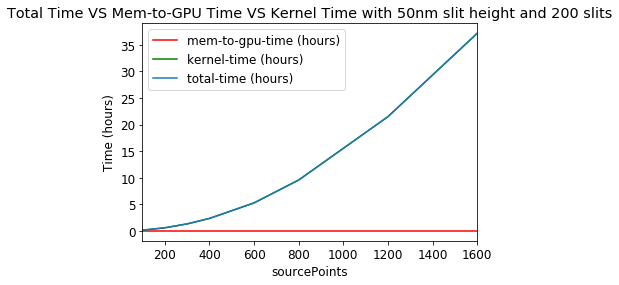

In [11]:
import matplotlib.pyplot as plt

plt.title("Total Time VS Mem-to-GPU Time VS Kernel Time with 50nm slit height and 200 slits") 
plt.rcParams["font.size"] = 12
plt.tick_params(labelsize=12)

plt.ylabel("Time (hours)") 

ax = plt.gca()
df.plot(kind='line',x='sourcePoints',y='mem-to-gpu-time (hours)', color='red', ax=ax)
df.plot(kind='line',x='sourcePoints',y='kernel-time (hours)', color='green', ax=ax)
df.plot(kind='line',x='sourcePoints',y='total-time (hours)',ax=ax) # total time slightly eclipses kernel time


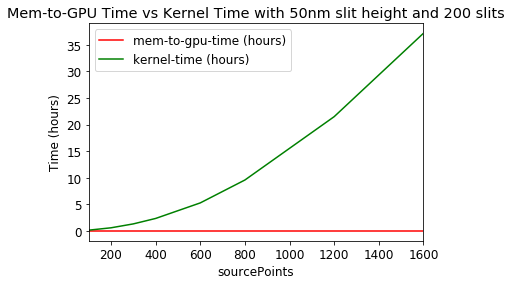

In [12]:
#made as comparison that the kernel time makes up a majority of the time

plt.title("Mem-to-GPU Time vs Kernel Time with 50nm slit height and 200 slits") 
plt.rcParams["font.size"] = 12
plt.tick_params(labelsize=12)

plt.ylabel("Time (hours)") 

ax = plt.gca()
df.plot(kind='line',x='sourcePoints',y='mem-to-gpu-time (hours)', color='red', ax=ax)
df.plot(kind='line',x='sourcePoints',y='kernel-time (hours)', color='green', ax=ax)

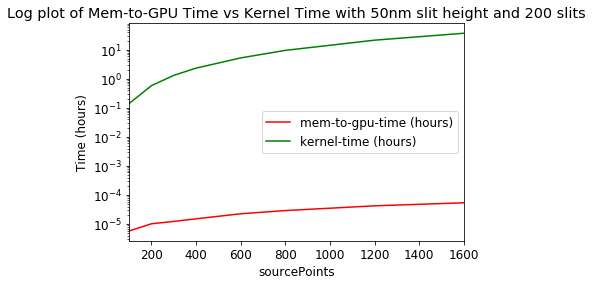

In [13]:
plt.title("Log plot of Mem-to-GPU Time vs Kernel Time with 50nm slit height and 200 slits") 
plt.rcParams["font.size"] = 12
plt.tick_params(labelsize=12)

plt.ylabel("Time (hours)") 

ax = plt.gca()
df.plot(logy=True, kind='line',x='sourcePoints',y='mem-to-gpu-time (hours)', color='red', ax=ax)
df.plot(logy=True, kind='line',x='sourcePoints',y='kernel-time (hours)', color='green', ax=ax)

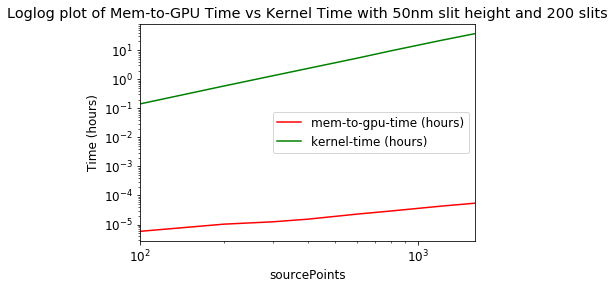

In [14]:
plt.title("Loglog plot of Mem-to-GPU Time vs Kernel Time with 50nm slit height and 200 slits") 
plt.rcParams["font.size"] = 12
plt.tick_params(labelsize=12)

plt.ylabel("Time (hours)") 

ax = plt.gca()
df.plot(loglog=True, kind='line',x='sourcePoints',y='mem-to-gpu-time (hours)', color='red', ax=ax)
df.plot(loglog=True, kind='line',x='sourcePoints',y='kernel-time (hours)', color='green', ax=ax)

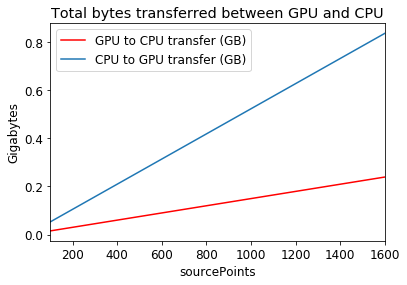

In [15]:
plt.title("Total bytes transferred between GPU and CPU") 
plt.rcParams["font.size"] = 12
plt.tick_params(labelsize=12)


plt.ylabel("Gigabytes") 

ax = plt.gca()
df.plot(kind='line',x='sourcePoints',y='GPU to CPU transfer (GB)', color='red', ax=ax)
df.plot(kind='line',x='sourcePoints',y='CPU to GPU transfer (GB)', ax=ax)

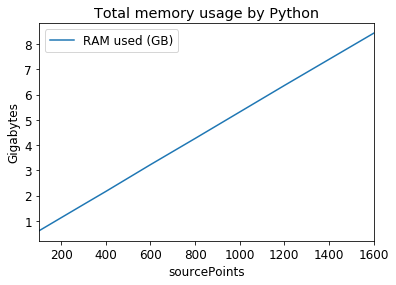

In [16]:
plt.title("Total memory usage by Python")
plt.ylabel("Gigabytes")

ax = plt.gca()
df.plot(kind='line', x='sourcePoints', y='RAM used (GB)', ax=ax)